## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


We have successfully read in the `ab_data.csv` data.

b. Use the below cell to find the number of rows in the dataset.

In [3]:
n = df.shape[0]
n

294478

The number of rows in the dataset is 294,478.

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

The number of unique users in the dataset is 290,584.

d. The proportion of users converted.

In [5]:
df[df['converted'] == 1].user_id.nunique()/df.user_id.nunique()

0.12104245244060237

The proportion of users converted is about 12.1 percent.

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Number of times they DO line up
n_do_control = df[(df.group == 'control') & (df.landing_page == 'old_page')].shape[0]
n_do_treatment = df[(df.group == 'treatment') & (df.landing_page == 'new_page')].shape[0]
n_do = n_do_control + n_do_treatment
n_do

290585

In [7]:
# Number of times to DON'T line up
n_dont = n - n_do
n_dont

3893

The number of times `new_page` and `treatment` don't line up is 3,893. 

f. Do any of the rows have missing values?

In [8]:
df.isna().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

None of the rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

We create a new pandas DataFrame `df2`.

In [9]:
df2 = df.copy()

In [10]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


We take the index of the rows that are not aligned.

In [11]:
rem = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index

We use the index to drop all the rows that are not aligned.

In [12]:
df2.drop(rem, inplace=True)

We verify

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

The correct rows where indeed removed.

In [14]:
df2.shape[0]

290585

We now have 290,585 rows.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

There are 290,584 unique users in `df2`.

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2.user_id.astype(str).value_counts()

773192    2
660608    1
688321    1
749212    1
799663    1
         ..
636109    1
739689    1
668968    1
875454    1
921198    1
Name: user_id, Length: 290584, dtype: int64

There seems to be two rows of data with user_id 773192.

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


We can see that both rows are attributed to this user and the associated row information.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
dupl_ind = df2[df2.user_id == 773192].index[0]
df2.drop(dupl_ind, inplace=True)
df2.shape[0]

290584

In [19]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


We removed one of the rows for this user and verified that the row count is down by 1, and the user is only represented by one row.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
conv_rate = df2.converted.mean()
conv_rate

0.11959708724499628

The probability of an individual converting regardless of the page they receive is about 11.96 percent.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
df2_control = df[df.group == 'control']
conv_control = df2_control.converted.mean()
conv_control

0.12039917935897611

Given that the individual was in the control group, the probability that they converted is about 12.04 percent.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
df2_treatment = df[df.group == 'treatment']
conv_treatment = df2_treatment.converted.mean()
conv_treatment

0.11891957956489856

Given that the individual was in the treatment group, the probability that they converted is about 11.89 percent.

d. What is the probability that an individual received the new page?

In [23]:
prob_new_page = df2[df2.landing_page == 'new_page']['user_id'].count()/df2.shape[0]
prob_new_page

0.5000619442226688

The probability that an individual received the new page is about 50.01 percent.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**I do not think there is sufficient evidence to say that the new treatment page leads to more conversions. Given that an individual was in the treatment group, the conversion ratio is actually slightly lower than for an invidual in the control group. And even if it was the other way around, the rates are very close, so it would probably not be enough to reject a null hypotesis saying that the old page has a equal or better conversion rate than the new page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: $p_{new} - p_{old} \leq 0$

$H_{1}$: $p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
p_new = conv_rate
p_new

0.11959708724499628

The convert rate for p_new under the null is assumed to be equal to the rate in our data regardless of landing page, which is about 0.1196.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = conv_rate
p_old

0.11959708724499628

The convert rate for p_old under the null is also assumed to be equal to the rate in our data regardless of landing page, which is about 0.1196.

c. What is $n_{new}$?

In [26]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

The count of users who received the new landing page $n_{new}$ is 145,310.

d. What is $n_{old}$?

In [27]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

The count of users who received the old landing page $n_{old}$ is 145,274.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(1, p_new, size=n_new)
len(new_page_converted), new_page_converted.mean()

(145310, 0.11893193861399766)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(1, p_old, size=n_old)
len(old_page_converted), old_page_converted.mean()

(145274, 0.12043448930985585)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.0015025506958581958

In [97]:
tot_converted = new_page_converted.sum() + old_page_converted.sum()
tot_converted

34778

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [64]:
p_diffs = np.array([])
for _ in range(10000):
    new_page_sim = np.random.binomial(1, p_new, size=n_new)
    old_page_sim = np.random.binomial(1, p_old, size=n_old)
    new_page_conv = new_page_sim.mean()
    old_page_conv = old_page_sim.mean()
    p_diffs = np.append(p_diffs, new_page_conv - old_page_conv)

In [65]:
p_diffs.size, p_diffs.mean()

(10000, 1.4623954443710757e-05)

Indeed we have a numpy array $p_{diffs}$ of the expected size. The mean is close to zero (0.00001)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

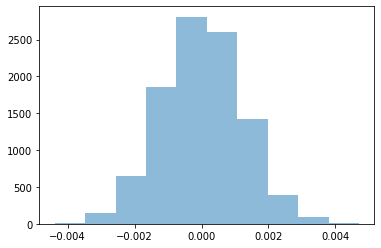

In [66]:
plt.hist(p_diffs, alpha=0.5);

**Based on the histogram it seems like $p_{diffs}$ is normally distributed with a mean close to zero. The Central Limit Theorem says that with a high number of samples from underlying distribution, the samples tend to be normally distributed even in cases when the underlying distribution is not. Hence this is as expected.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [95]:
obs_diff

-0.0015025506958581958

In [67]:
(p_diffs > obs_diff).mean()

0.8972

The proportion of p_diffs that are greater than the actual difference observed is about 0.90.

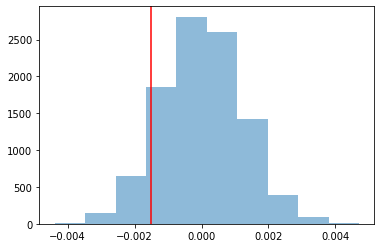

In [68]:
plt.hist(p_diffs, alpha=0.5);
plt.axvline(obs_diff, color='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j I computed the probability that the observed differences, or something more extreme in the direction of the alternative hypotesis, actually came from the null. This is called the p-value, and can be compared to the Type 1 error rate (in this case 5 percent). If the p-value were less than 5 percent, we would reject the null hypotesis. However, in this case it is much higher (90 percent). Hence, we fail to reject the null hypotesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [69]:
import statsmodels.api as sm

convert_old = df2[df2.landing_page == 'old_page']['converted'].sum()
convert_new = df2[df2.landing_page == 'new_page']['converted'].sum()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [117]:
old_page_converted.mean(), tot_converted, n_new + n_old

(0.12043448930985585, 34778, 290584)

In [116]:
from statsmodels.stats.proportion import proportions_ztest

count = tot_converted
nobs = n_new + n_old
value = old_page_converted.mean()


stat, pval = proportions_ztest(count, nobs, value, alternative='larger')

print('z-score: {0:0.3f}'.format(stat))
print('p-value: {0:0.3f}'.format(pval))


z-score: -1.248
p-value: 0.894


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

With a z-score of -1.248 we get a p-value of 0.894. This is in accordance with previous findings, and the conclusion is that we fail to reject the null hypotesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [71]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [72]:
df2['ab_page'] = 0 #initializing

In [73]:
df2['ab_page'] = (df2['group'] == 'treatment')

In [74]:
df2['ab_page'] = df2['ab_page'].astype(int)

In [75]:
df2['intercept'] = 1

In [76]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [77]:
import statsmodels.api as sm

In [78]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [79]:
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:42:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**The p-value associated with ab_page is 0.19. It differs because the p-value in the Python results summary uses a not equal to, ie. two-sided alternative hypotesis.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding more factors might make our model fit better (increase R-squared). However, there is a risk of making the model unneccessarily complex, so that harder to interpret coefficients etc.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [80]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [81]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [82]:
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])

In [83]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [84]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])

In [85]:
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:               2.323e-05
Time:                        13:43:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

Based on low p-values country seems to be significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [86]:
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK']
df_new['ab_page_CA'] = df_new['ab_page']*df_new['CA']

In [87]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA,ab_page_UK,ab_page_CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [88]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA', 'ab_page_UK', 'ab_page_CA']])

In [89]:
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:               3.482e-05
Time:                        13:44:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
CA             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_CA     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

It does not look like adding interactions really helped the model that much. So it is better to keep the model more simple without any interaction terms. In other words, there will not be any practical significant improvement by adding interactions, hence we avoid doing that.

The conclusion remains that we fail to reject the null hypotesis. Still we cannot know for sure if the new page might in fact lead to more conversion. One thing we could do is keep adding data continuosly for some time. For instance, we could stop it once we had enough proof to reject the null, or, we could stop it after, say, 3 months, if there was never enough proof. 


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.